In [477]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import LSTM

In [478]:
import matplotlib.pyplot as plt

In [479]:
x_train = pd.read_csv('./trajectory/traj_x_train_rand.csv', header=None)
x_train = np.array(x_train)
x_train = x_train.reshape(210,3)

In [480]:
x_max = max(x_train[:,0])
x_min = min(x_train[:,0])
y_max = max(x_train[:,1])
y_min = min(x_train[:,1])
z_max = max(x_train[:,2])
z_min = min(x_train[:,2])
print(x_min, x_max, y_min, y_max, z_min, z_max)

66.4967 95.4134 -15.1893 281.438 1.43447 58.4673


In [481]:
from keras.utils import np_utils

In [482]:
y_train = pd.read_csv('./trajectory/traj_y_train_rand.csv', header=None)
#y_train = np.array([1,1,2,2,3,3])
#y_train = y_train.reshape(6,1)
#y_train

In [483]:
#y_train = np_utils.to_categorical(y_train, 3)
y_train

,0,1,2
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,0,1


In [484]:
#x_train = np.array(x_train)
x_train = x_train.reshape(6, 35, 3)
x_train

array([[[ 80.3112   , 281.438    ,  51.5533   ],
        [ 80.0505   , 273.461    ,  51.7356   ],
        [ 79.9754   , 261.138    ,  52.8257   ],
        [ 79.5347   , 253.558    ,  52.2605   ],
        [ 79.2941   , 244.408    ,  52.7699   ],
        [ 79.2358   , 231.722    ,  54.0881   ],
        [ 79.0199   , 222.827    ,  53.0501   ],
        [ 78.8055   , 212.655    ,  52.7008   ],
        [ 78.6025   , 203.006    ,  52.3725   ],
        [ 78.2482   , 196.869    ,  50.9828   ],
        [ 78.0646   , 184.602    ,  50.7346   ],
        [ 78.0608   , 175.883    ,  49.6206   ],
        [ 77.7379   , 164.896    ,  49.2999   ],
        [ 77.4395   , 156.588    ,  47.3349   ],
        [ 77.3069   , 147.375    ,  45.6284   ],
        [ 77.038    , 138.489    ,  43.7599   ],
        [ 76.7867   , 129.715    ,  41.368    ],
        [ 76.6865   , 121.448    ,  39.2205   ],
        [ 76.4693   , 111.406    ,  37.3263   ],
        [ 76.2647   , 102.615    ,  34.7996   ],
        [ 76.1035   

In [485]:
y_train = np.array(y_train)
#y_train.reshape(6, 3)
y_train.shape

(6, 3)

In [486]:
tmp = np.zeros((6,35,3))
for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        tmp[i,j,0] = (x_train[i,j,0]-x_min)/(x_max-x_min)
        tmp[i,j,1] = (x_train[i,j,1]-y_min)/(y_max-y_min)
        tmp[i,j,2] = (x_train[i,j,2]-z_min)/(z_max-z_min)
        
tmp

array([[[0.47773432, 1.        , 0.87877158],
        [0.46871877, 0.97310767, 0.88196798],
        [0.46612165, 0.93156395, 0.90108153],
        [0.45088132, 0.90601   , 0.89117145],
        [0.44256087, 0.87516321, 0.90010315],
        [0.44054474, 0.83239574, 0.92321615],
        [0.43307846, 0.80240861, 0.90501611],
        [0.42566406, 0.76811642, 0.89889157],
        [0.4186439 , 0.73558739, 0.89313523],
        [0.40639146, 0.71489812, 0.86876857],
        [0.40004219, 0.6735432 , 0.86441669],
        [0.39991078, 0.64414941, 0.84488408],
        [0.38874422, 0.60710966, 0.839261  ],
        [0.37842492, 0.57910145, 0.80480716],
        [0.37383934, 0.54804227, 0.7748858 ],
        [0.36454021, 0.51808549, 0.74212397],
        [0.35584973, 0.48850628, 0.70018496],
        [0.35238461, 0.46063629, 0.66253121],
        [0.34487338, 0.42678236, 0.62931876],
        [0.33779788, 0.39714585, 0.58501621],
        [0.33222325, 0.35463189, 0.56206276],
        [0.32515121, 0.34062846, 0

In [487]:
n_hidden = 512
n_step = tmp.shape[1]
n_input = tmp.shape[2]
n_classes = 3
batch_size = 3

In [488]:
model = Sequential()
#model.add(LSTM(units=n_hidden, batch_size=(None, n_step, n_input), unroll=True))
model.add(LSTM(units=n_hidden, activation='tanh', batch_size=(None, n_step, n_input), unroll=True, return_sequences=True))
#model.add(LSTM(units=n_hidden, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=n_hidden, activation='tanh', unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [489]:
training_iters = 50
history = model.fit(tmp, y_train, batch_size=batch_size, epochs=training_iters)
#model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters)
#result = model.evaluate(tmp, y_train, batch_size=batch_size)
#print ('\nTraining accuracy:', result[1])

Epoch 1/50
6/6 [==============================] - 36s 6s/step - loss: 1.0718 - acc: 0.3333
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.8969 - acc: 0.5000
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 1.1744 - acc: 0.6667
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6556 - acc: 0.8333
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7276 - acc: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7607 - acc: 0.6667
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 1.1099 - acc: 0.3333
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7961 - acc: 0.5000
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9043 - acc: 0.6667
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9232 - acc: 0.6667
Epoch 11/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9042 -

In [490]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


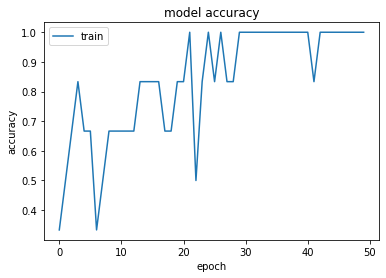

In [491]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

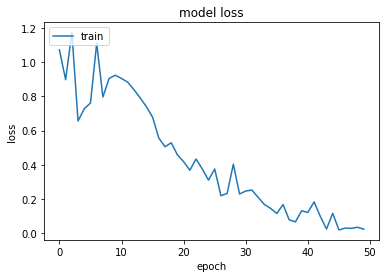

In [492]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [493]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 35, 512)           1056768   
_________________________________________________________________
lstm_36 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 1539      
Total params: 3,157,507
Trainable params: 3,157,507
Non-trainable params: 0
_________________________________________________________________


In [494]:
for i in range(tmp.shape[0]):
    t = tmp[i,:,:]
    t = t.reshape(1,35,3)
    p = model.predict(t)
    print(i, p)

0 [[0.00192859 0.00122473 0.9968466 ]]
1 [[0.9899541  0.00165178 0.00839411]]
2 [[0.00004668 0.99995315 0.00000009]]
3 [[0.9483549  0.00148071 0.05016433]]
4 [[0.00000578 0.99992967 0.00006447]]
5 [[0.0290021  0.00225891 0.968739  ]]


In [495]:
print(y_train)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


In [496]:
x_test = pd.read_csv('./trajectory/traj_x_test.csv', header=None)
x_test = np.array(x_test)
x_test.shape

(3, 105)

In [497]:
x_test = x_test.reshape(3, 35, 3)
test_up = x_test[0, :, :]
test_right = x_test[1, :, :]
test_down = x_test[2, :, :]
test_down.shape

(35, 3)

In [498]:
test_up = test_up.reshape(1, 35, 3)
test_right = test_right.reshape(1, 35, 3)
test_down = test_down.reshape(1, 35, 3)

In [499]:
nor_test_up = np.copy(test_up)
nor_test_right = np.copy(test_right)
nor_test_down = np.copy(test_down)

In [500]:
#'''
for j in range(35):
    nor_test_up[:,j,0] = (nor_test_up[:,j,0]-x_min)/(x_max-x_min)
    nor_test_up[:,j,1] = (nor_test_up[:,j,1]-y_min)/(y_max-y_min)
    nor_test_up[:,j,2] = (nor_test_up[:,j,2]-z_min)/(z_max-z_min)
    
    nor_test_right[:,j,0] = (nor_test_right[:,j,0]-x_min)/(x_max-x_min)
    nor_test_right[:,j,1] = (nor_test_right[:,j,1]-y_min)/(y_max-y_min)
    nor_test_right[:,j,2] = (nor_test_right[:,j,2]-z_min)/(z_max-z_min)
        
    nor_test_down[:,j,0] = (nor_test_down[:,j,0]-x_min)/(x_max-x_min)
    nor_test_down[:,j,1] = (nor_test_down[:,j,1]-y_min)/(y_max-y_min)
    nor_test_down[:,j,2] = (nor_test_down[:,j,2]-z_min)/(z_max-z_min)
#'''

In [501]:
nor_test_up

array([[[0.48321212, 0.97410555, 0.89538832],
        [0.480698  , 0.94156977, 0.92071759],
        [0.47832567, 0.91032181, 0.94169323],
        [0.47555911, 0.87249319, 0.95822231],
        [0.47349456, 0.84328482, 0.96542693],
        [0.47154067, 0.81510131, 0.96941937],
        [0.46926171, 0.78087654, 0.96715927],
        [0.46668188, 0.74213769, 0.96464317],
        [0.45965134, 0.72144169, 0.93914908],
        [0.45249285, 0.69573603, 0.91698466],
        [0.45600293, 0.65545653, 0.90596118],
        [0.45458507, 0.62641672, 0.87828589],
        [0.44310035, 0.60720406, 0.83677822],
        [0.44195223, 0.57390301, 0.79554232],
        [0.44097356, 0.54144477, 0.74731045],
        [0.43533322, 0.51416137, 0.69400957],
        [0.43493898, 0.48760954, 0.63859763],
        [0.43424388, 0.45442985, 0.58835464],
        [0.42967904, 0.4317819 , 0.51540718],
        [0.42532516, 0.40980146, 0.44494601],
        [0.42094707, 0.37765742, 0.37527386],
        [0.42154879, 0.35282693, 0

In [502]:
pred_up = model.predict(nor_test_up)
pred_right = model.predict(nor_test_right)
pred_down = model.predict(nor_test_down)

In [503]:
np.set_printoptions(suppress=True)
print(pred_up)
print(pred_right)
print(pred_down)

[[0.9921217  0.0061318  0.00174648]]
[[0.00658216 0.02254381 0.970874  ]]
[[0.03430399 0.00229181 0.9634042 ]]


In [504]:
for i in range(pred_up.shape[1]):
    if pred_up[0][i] == max(pred_up[0][:]):
        pred_up[0][i] = 1
    else:
        pred_up[0][i] = 0
        
    if pred_right[0][i] == max(pred_right[0][:]):
        pred_right[0][i] = 1
    else:
        pred_right[0][i] = 0
        
    if pred_down[0][i] == max(pred_down[0][:]):
        pred_down[0][i] = 1
    else:
        pred_down[0][i] = 0
    
print(pred_up)
print(pred_right)
print(pred_down)

[[1. 0. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]


In [505]:
#model.save('./saved model/classifier_97_72_82.h5')

In [506]:
#from keras.models import load_model
#classifier = load_model('classifier_52_73_70.h5')
#test_model = classifier.predict(nor_test_up)
#print(test_model)